## Regressão Linear

 Neste exercício, você aplicará os conceitos de regressão logística para classificar uma variável dependente com base em uma ou mais variáveis independentes. Além disso, você realizará todas as etapas de pré-processamento e avaliação necessárias para criar um modelo robusto.


### Instruções

Busque uma base de dados que seja apropriada para um problema de classificação. A base deve conter pelo menos uma variável dependente e duas ou mais variáveis independentes.

In [92]:
import pandas as pd

dados_cancer = pd.read_csv('data.csv')
dados_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN



Pré-processamento de Dados

    Elementos Faltantes: Preencha ou remova quaisquer elementos faltantes na base de dados (caso existam).
    Variáveis Categóricas: Se houver variáveis categóricas, transforme-as em variáveis numéricas.
    Normalização: Normalize as variáveis se necessário.
    Separação de Dados: Divida a base em conjuntos de treino e teste.



In [93]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

print(f"Elementos faltantes:\n{dados_cancer.isna().sum()}\n")

# Preencher elementos faltantes
imputer = SimpleImputer(strategy='mean')
dados_cancer[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]] = imputer.fit_transform(dados_cancer[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]])

# Não há variáveis categóricas

# Normalização
scaler = MinMaxScaler()
dados_cancer[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]] = scaler.fit_transform(dados_cancer[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]])

# Separação de Dados
XTrain, XTest, yTrain, yTest = train_test_split(dados_cancer.drop(columns=['id', 'diagnosis']), dados_cancer["diagnosis"], test_size=0.2)

Elementos faltantes:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_


Modelagem e Treino

    Utilize a base de treino para criar e treinar um modelo de regressão logística usando a scikit-learn.



In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Preencher elementos faltantes nos dados de treino
imputer = SimpleImputer(strategy='mean')
XTrain = imputer.fit_transform(XTrain)
# Preencher elementos faltantes nos dados de teste
imputer = SimpleImputer(strategy='mean')
XTest = imputer.fit_transform(XTest)

# Criar e treinar o modelo de regressão logística
modelo_reglog = LogisticRegression()
modelo_reglog.fit(XTrain, yTrain)

/home/vitorsergio/.local/lib/python3.10/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/home/vitorsergio/.local/lib/python3.10/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LogisticRegression()


Avaliação de Modelo

    Utilize a base de teste para fazer previsões.
    Calcule métricas como a acurácia, precisão, recall e F1-score para avaliar o desempenho do modelo.



In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

yPred = modelo_reglog.predict(XTest)

# Criar DataFrame de comparação entre os rótulos reais e as previsões
dfComparacao = pd.DataFrame({"Real": yTest, "Predição": yPred})
print(dfComparacao)

# Converter os rótulos da base de teste para 0 e 1
# Converter os rótulos da base de teste para 0 e 1
yTest = yTest.map({'B': 0, 'M': 1})
yPred = np.where(yPred == 'B', 0, 1)


# Calcular métricas de avaliação
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)


print(f"\nAcurácia: {accuracy}\nPrecisão: {precision}\nRecall: {recall}\nF1-score: {f1}")

    Real Predição
34     M        M
522    B        B
294    B        B
368    M        M
409    B        B
..   ...      ...
38     M        B
395    B        B
460    M        M
341    B        B
422    B        B

[114 rows x 2 columns]

Acurácia: 0.9035087719298246
Precisão: 1.0
Recall: 0.7659574468085106
F1-score: 0.8674698795180723



Visualização

    Gere gráficos que mostrem a eficácia do modelo, como curvas ROC ou matrizes de confusão.



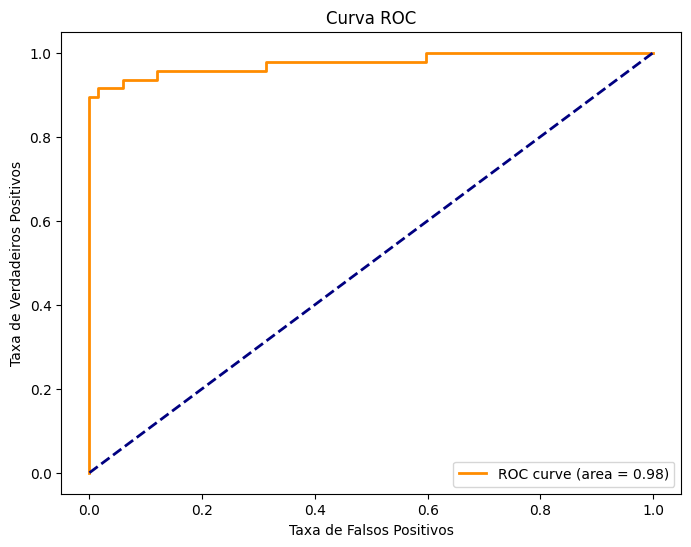

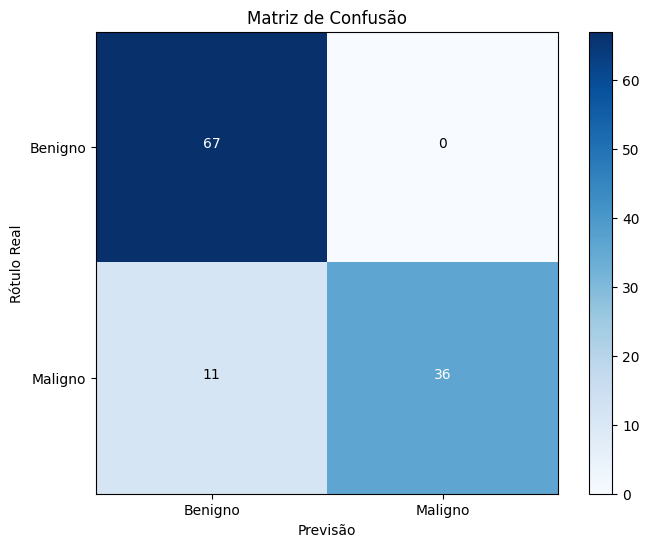

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Curva ROC
y_probs = modelo_reglog.predict_proba(XTest)[:, 1]
fpr, tpr, thresholds = roc_curve(yTest, y_probs)
roc_auc = auc(fpr, tpr)

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Matriz de Confusão
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(yTest, yPred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()

classes = ['Benigno', 'Maligno']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('Rótulo Real')
plt.xlabel('Previsão')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()